In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import warnings #Ignore Warnings
from nnAudio.Spectrogram import CQT1992v2
import torch 
from matplotlib.gridspec import GridSpec
import sys

warnings.filterwarnings("ignore")
sys.path.append('G:/David/DL_project/Gravitational-Wave-Detection/src/Data')

from data_processing import id2path
# from ..Data.data_processing import id2path

In [201]:
train_labels = pd.read_csv("G:/W_project/Waves_data/g2net-gravitational-wave-detection/training_labels.csv")
sample_submission = pd.read_csv("G:/W_project/Waves_data/g2net-gravitational-wave-detection/training_labels.csv")

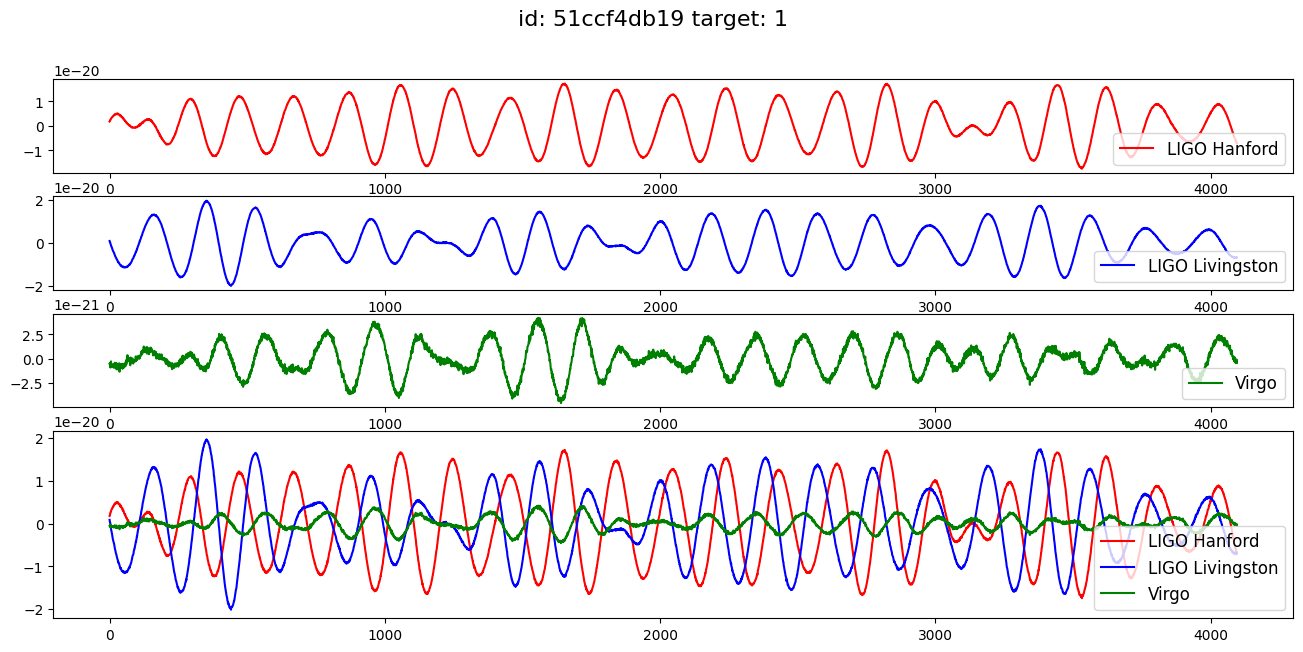

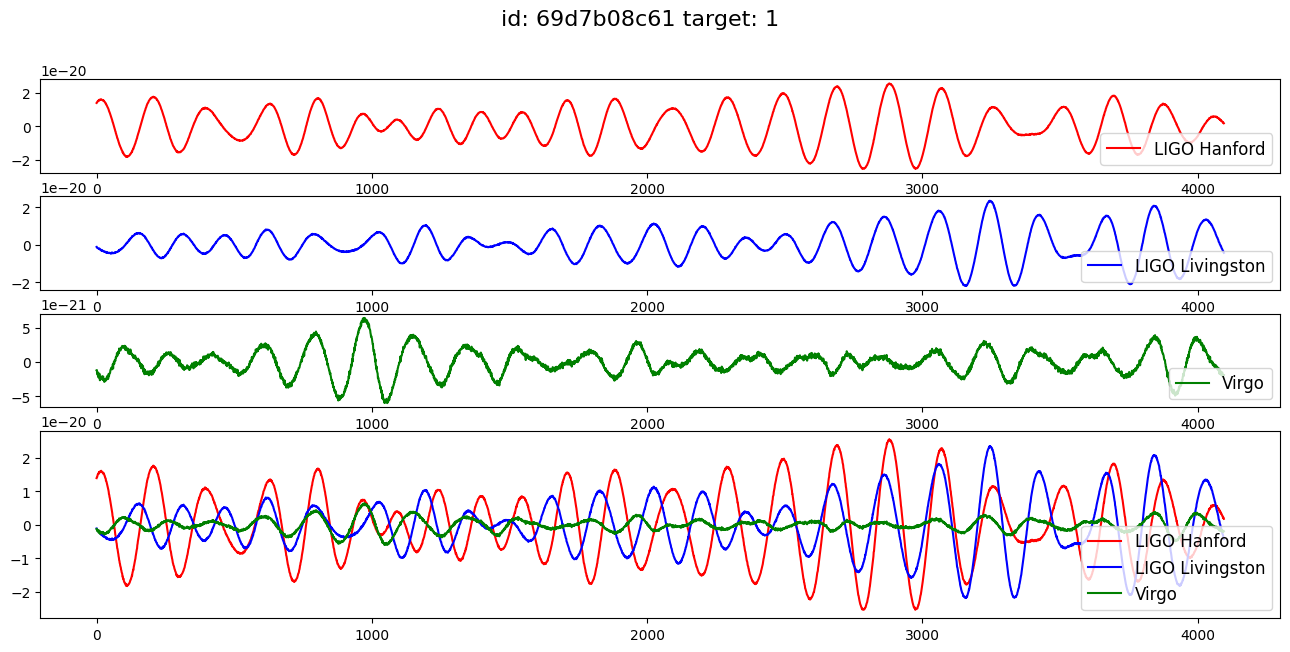

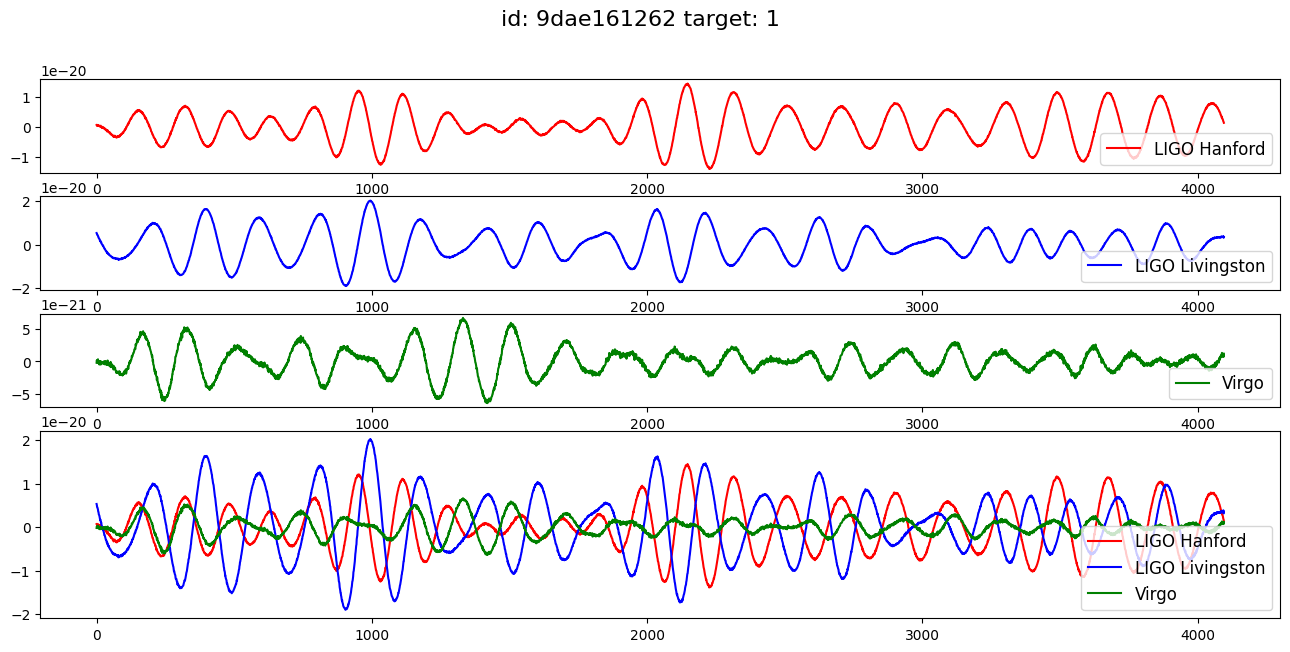

In [202]:
# Function to visualize a sample of signals
def visualizeSample(_id, target, colors=("red", "blue", "green"), signal_names=("LIGO Hanford", "LIGO Livingston", "Virgo")):
    # Get file path for the given ID
    path = id2path(_id)
    
    # Load data
    x = np.load(path)
    
    # Set up the figure
    fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(16, 7), gridspec_kw={"height_ratios": [1, 1, 1, 2]})
    
    # Plot each signal separately
    for i in range(3):
        axs[i].plot(x[i], color=colors[i])
        axs[i].legend([signal_names[i]], fontsize=12, loc="lower right")
    
    # Plot all three signals overlaid on each other
    for i, color in enumerate(colors):
        axs[3].plot(x[i], color=color, label=signal_names[i])
    axs[3].legend(fontsize=12, loc="lower right")
    
    # Set the title
    fig.suptitle(f"id: {_id} target: {target}", fontsize=16)
    
    # Show the plot
    plt.show()

# Loop to visualize a random sample of signals
for i in random.sample(sample_submission.index.tolist(), 3):
    _id = sample_submission.iloc[i]["id"]
    target = sample_submission.iloc[i]["target"]
    
    visualizeSample(_id, target)


In [203]:
Q_TRANSFORM = CQT1992v2(sr=2048, fmin=20, fmax=1024, hop_length=32)

def visualizeSampleQtransform(
    _id, 
    target,
    signal_names=("LIGO Hanford", "LIGO Livingston", "Virgo"),
    sr=2048,
):
    """
    Visualizes the CQT (Constant-Q Transform) spectrogram of gravitational wave signals.

    Args:
    _id (str): Identifier of the sample.
    target: The target label or information associated with the sample.
    signal_names (tuple, optional): Names of the signals. Defaults to ("LIGO Hanford", "LIGO Livingston", "Virgo").
    sr (int, optional): Sampling rate. Defaults to 2048.
    """
    # Load the gravitational wave signals
    x = np.load(id2path(_id))
    
    # Plot the CQT spectrogram for each signal
    plt.figure(figsize=(16, 5))
    for i in range(len(signal_names)):
        # Normalize the waveforms
        waves = x[i] / np.max(x[i])
        
        # Convert the waveforms to torch tensors
        waves = torch.from_numpy(waves).float()
        
        # Apply Constant-Q Transform (CQT)
        image = Q_TRANSFORM(waves)
        
        # Plot the CQT spectrogram
        plt.subplot(1, len(signal_names), i + 1)
        plt.imshow(image.squeeze())
        plt.title(signal_names[i], fontsize=14)

    # Set the title for the plot
    plt.suptitle(f"ID: {_id} | Target: {target}", fontsize=16)
    plt.show()


CQT kernels created, time used = 0.0150 seconds


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\nnAudio\utils.py:429: SyntaxWarning: If fmax is given, n_bins will be ignored
  warnings.warn("If fmax is given, n_bins will be ignored", SyntaxWarning)


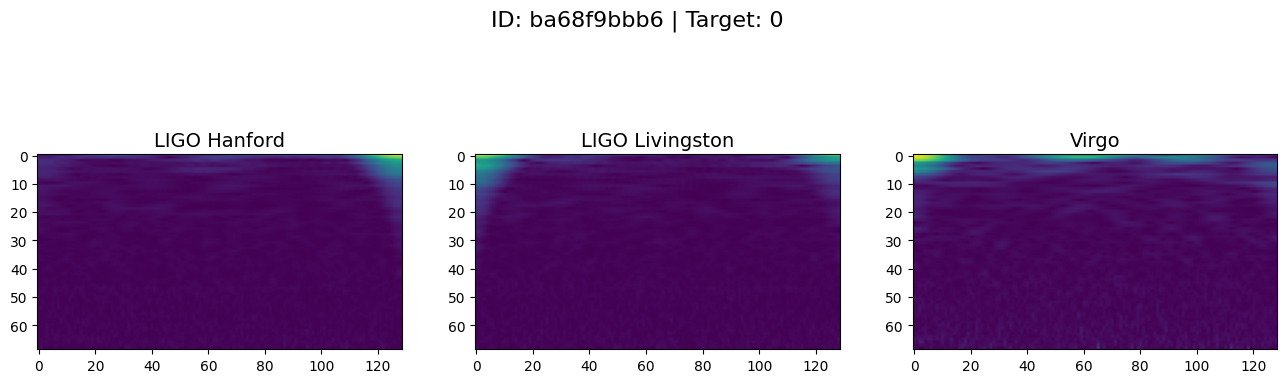

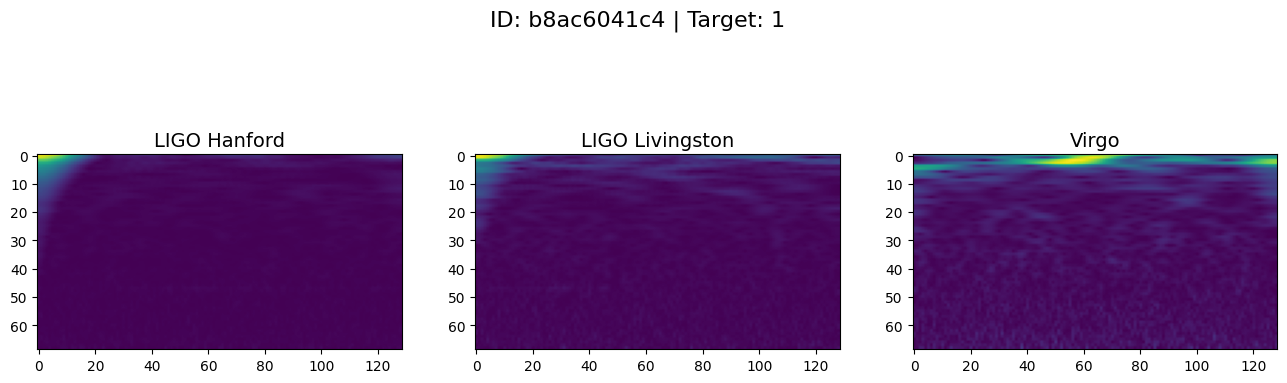

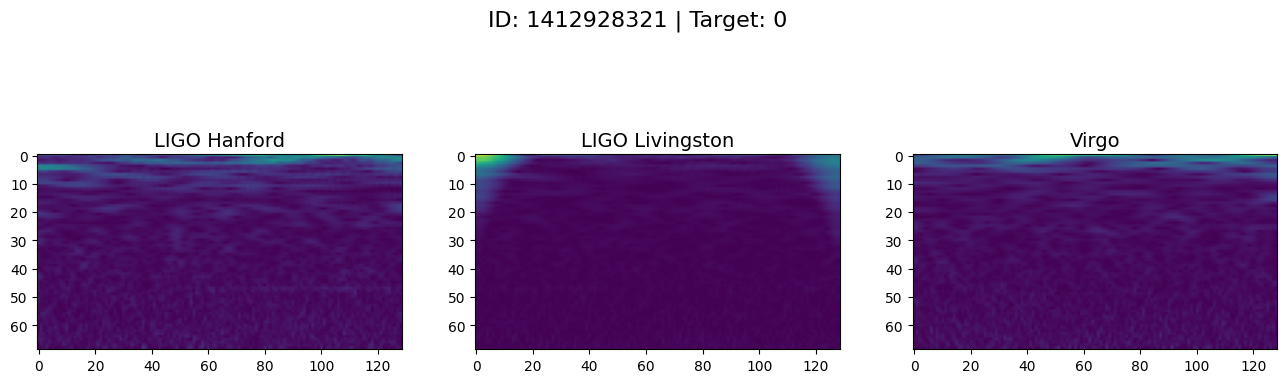

In [204]:
# Loop through 3 random samples from sample_submission and visualize their CQT spectrograms
for i in random.sample(sample_submission.index.tolist(), 3):
    # Get the ID and target label for the sample
    _id = sample_submission.iloc[i]["id"]
    target = sample_submission.iloc[i]["target"]
    
    # Visualize the CQT spectrogram for the sample
    visualizeSampleQtransform(_id, target)


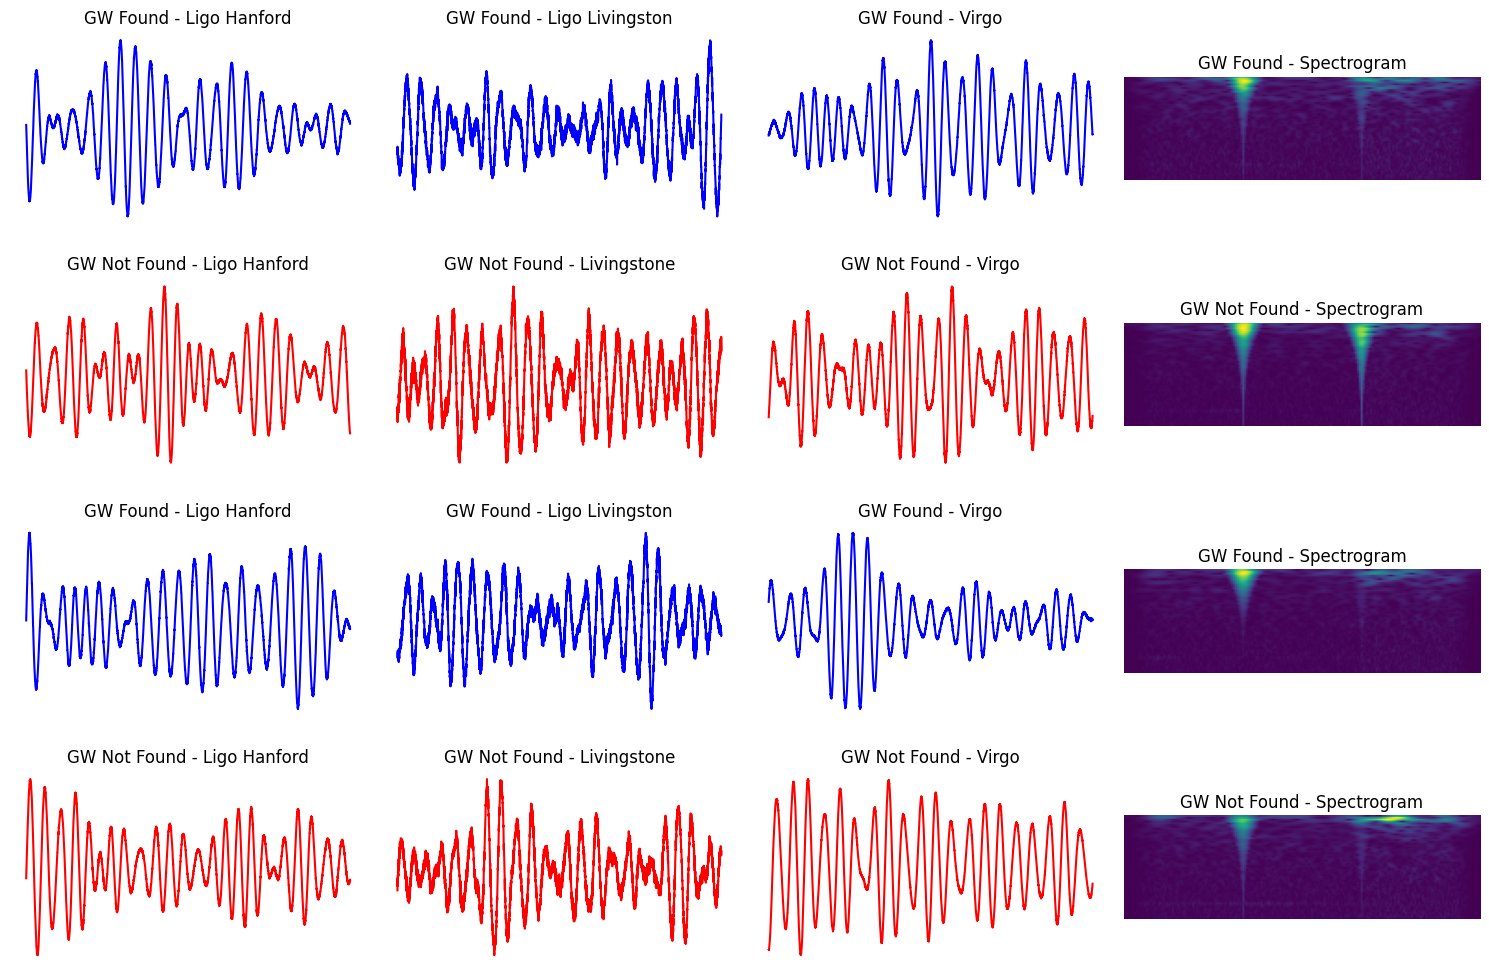

In [207]:
# Select two samples with 'target' label as 0 (indicating presence of gravitational waves)
targets = train_labels[train_labels["target"] == 0]["id"].head(2)

# Select two samples with 'target' label as 1 (indicating absence of gravitational waves)
no_targets = train_labels[train_labels["target"] == 1]["id"].head(2)

# Create a figure and grid layout
fig = plt.figure(figsize=(15, 10))
gs = GridSpec(4, 4, figure=fig)

# Iterate through selected samples (with and without gravitational waves)
for i, (target, no_target) in enumerate(zip(targets, no_targets)):
    # Plot gravitational waves found (with 'target' label as 0)
    ax1 = fig.add_subplot(gs[i*2, 0])
    ax1.plot(np.load(id2path(target))[1, :], color='blue')
    ax1.set_title("GW Found - Ligo Hanford")
    ax1.set_axis_off()

    ax2 = fig.add_subplot(gs[i*2, 1])
    ax2.plot(np.load(id2path(target))[2, :], color='blue')
    ax2.set_title("GW Found - Ligo Livingston")
    ax2.set_axis_off()

    ax3 = fig.add_subplot(gs[i*2, 2])
    ax3.plot(np.load(id2path(target))[0, :], color='blue')
    ax3.set_title("GW Found - Virgo")
    ax3.set_axis_off()
    
    ax4 = fig.add_subplot(gs[i*2, 3])
    ax4.imshow(increase_dimension(target, is_train=True))
    ax4.set_title("GW Found - Spectrogram")
    ax4.set_axis_off()
    

    # Plot gravitational waves not found (with 'target' label as 1)
    ax5 = fig.add_subplot(gs[i*2 + 1, 0])
    ax5.plot(np.load(id2path(no_target))[1, :], color='red')
    ax5.set_title("GW Not Found - Ligo Hanford")
    ax5.set_axis_off()

    ax6 = fig.add_subplot(gs[i*2 + 1, 1])
    ax6.plot(np.load(id2path(no_target))[2, :], color='red')
    ax6.set_title("GW Not Found - Livingstone")
    ax6.set_axis_off()

    ax7 = fig.add_subplot(gs[i*2 + 1, 2])
    ax7.plot(np.load(id2path(no_target))[0, :], color='red')
    ax7.set_title("GW Not Found - Virgo")
    ax7.set_axis_off()

    ax8 = fig.add_subplot(gs[i*2 + 1, 3])
    ax8.imshow(increase_dimension(no_target, is_train=True))
    ax8.set_title("GW Not Found - Spectrogram")
    ax8.set_axis_off()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
